In [4]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [6]:
# This cell contains "things" that are common to both
# versions. 

# Function for Grouping
# I didn't really think about how it should be grouped,
# I was just trying to create as many classes as possible.
# So, treat these groups as a mere example.
def group(streams):
    # Each group has a lower and upper bound.
    groups = [(0, 1000000, "Group A"), (1000000, 5000000, "Group B"), (5000000, 10000000, "Group C"), (10000000, 100000000, "Group D"),]
    for l, r, groupName in groups:
        if l <= streams <= r:
            return groupName
    return "Group E"

# Non-Numerical Features; do we need track??
dropFeatures = ['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri', 'Title', 'Channel', 'Views', 'Likes', 'Comments', 'Description', 'Licensed', 'official_video', 'Url_youtube']

# Data
data = pd.read_csv("/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv")

# for column in categorical_columns:
#     data[column] = LabelEncoder().fit_transform(data[column])

data.drop(dropFeatures, axis=1, inplace=True)

data.dropna(inplace=True)

In [ ]:
# Classification (Grouping Done Before)
# I think Jaden proposed that we partition the streams beforehand and use classification.
# So, here is something like that.

# Extracting
x = StandardScaler().fit_transform(data)
y = LabelEncoder().fit_transform(np.vectorize(group)(data["Stream"]))
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

# Model
# Using the default final estimator (LogisticRegression)
st = StackingClassifier(estimators=[
    ('LogisticRegression', LogisticRegression()), 
    ('KNeighbors', KNeighborsClassifier()), 
    ('DecisionTree', DecisionTreeClassifier())
])

# Fit and Predict
st.fit(xTrain, yTrain)
yPred = st.predict(xTest)

# This has a score of 1.0,
# I'm not sure if that means anything
st.score(xTest, yTest)

In [ ]:
# Regression (Grouping Done After)
# Ana proposed that we group the streams after the prediction;
# so we'd use regression to predict the number of streams, and then we'd
# return the group said stream belongs to (i.e. streams < 100,000,000 belong to "flop").

# Extracting
x = StandardScaler().fit_transform(data)
y = data["Stream"]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

# Model
# I'm just using the default estimator provided for the final estimator (RidgeCV).
st = StackingRegressor(estimators=[
    ('KNeighbors', KNeighborsRegressor()), 
    ('LinearRegression', LinearRegression()), 
    ('DecisionTree', DecisionTreeRegressor())
])

# Fitting and Scoring
st.fit(xTrain, yTrain)

# This has a dire score,
# I think it's caused by the models being used?
# Maybe stacking is not the best way to go here.
st.score(xTest, yTest)

In [ ]:
# Regression (Continued)
# When bagging is used, the R^2 score is closer to 1.
# As a side note, it had a score of 0.9999371139478829.
# So, if we do regression, maybe we use bagging.
# Also, I'm using the default model for BaggingRegressor,
# which I think is a Decision Tree?
bg = BaggingRegressor()
bg.fit(xTrain, yTrain)

# Printing Score
print("R^2 Score: ", bg.score(xTest, yTest))

# Printing Predictions
# Also, I'm not sure if I'm doing something wrong, but
# the groups constantly change. If you rerun this cell,
# you'll see different groups printed. I feel like that's
# not supposed to happen? I'm rerunning the cell and
# I'm not seeing this anymore, so nevermind.
groupedPredictions = np.vectorize(group)(bg.predict(xTest))
print(groupedPredictions)

In [7]:
df_num = data[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Stream']]
df_num.dropna(inplace=True)

In [13]:
from sklearn.neural_network import MLPRegressor 
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x = RobustScaler().fit_transform(df_num.drop(['Stream'], axis=1))
y = df_num["Stream"]
#y = RobustScaler(df["Stream"]) # skewed data
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=0)

# multiple layer neural net for regression
nnRegress = MLPRegressor(hidden_layer_sizes=(5,2), activation='tanh', solver='adam', max_iter=1000)
# try permuting activation functions, layer dims
nnRegress.fit(xTrain,yTrain)

yPred = nnRegress.predict(xTest)
print(mean_squared_error(yTest, yPred))

7.699884352806928e+16


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

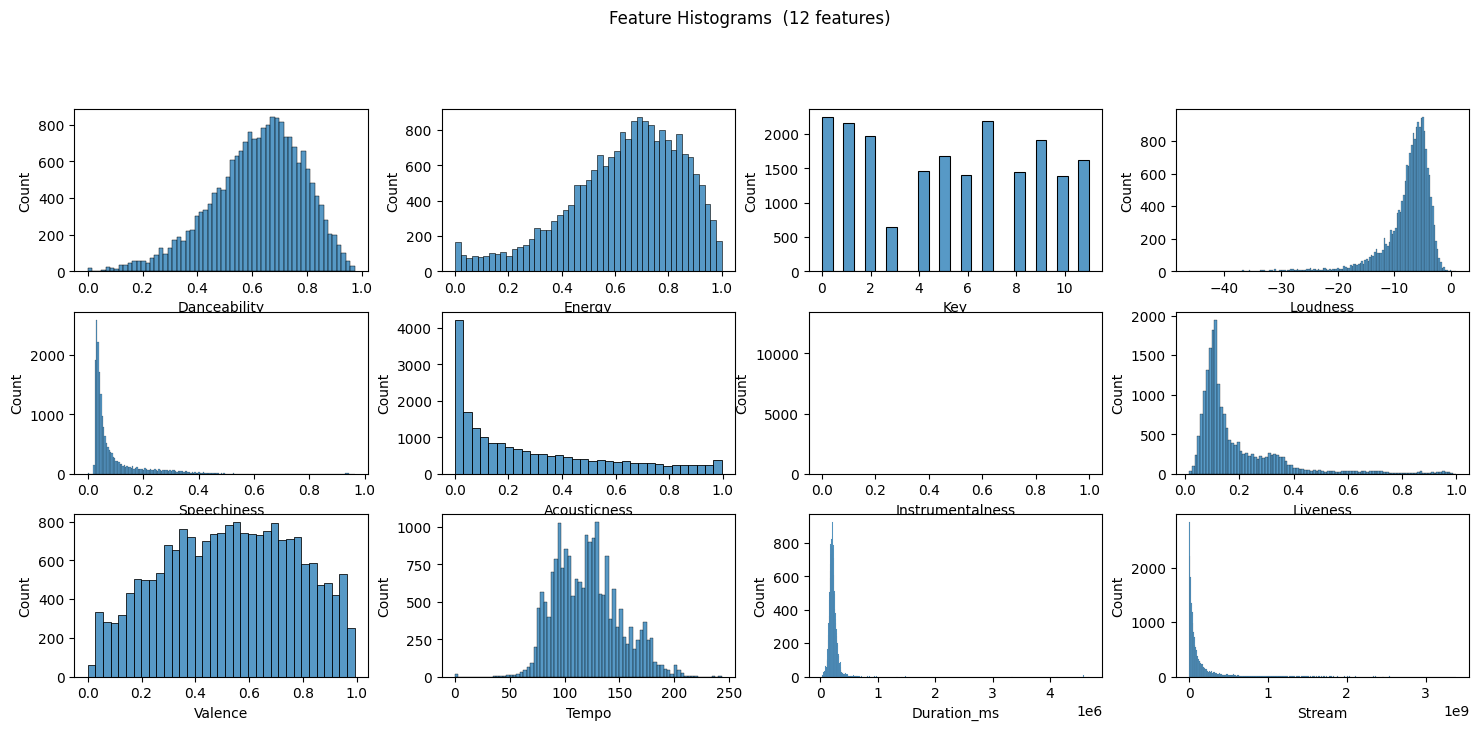

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# visualizing features 
def feature_histogram_set(feature_df):
    n, feature_count = feature_df.shape
    fig, axes = plt.subplots(feature_count//4 + 1, 4, figsize=(18,10))
    plt.subplots_adjust(hspace=0.25, wspace=0.25)
    axes = axes.flatten()
    fig.suptitle(f'Feature Histograms  ({feature_count} features)')
    # fill subplots with each feature
    for index, col in enumerate(feature_df.items()):
        label, content = col
        sns.histplot(content, ax=axes[index])
    # remove unused plots
    for i in range(feature_count, axes.size):
        fig.delaxes(axes[i])
        
feature_histogram_set(df_num.iloc[:,:])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

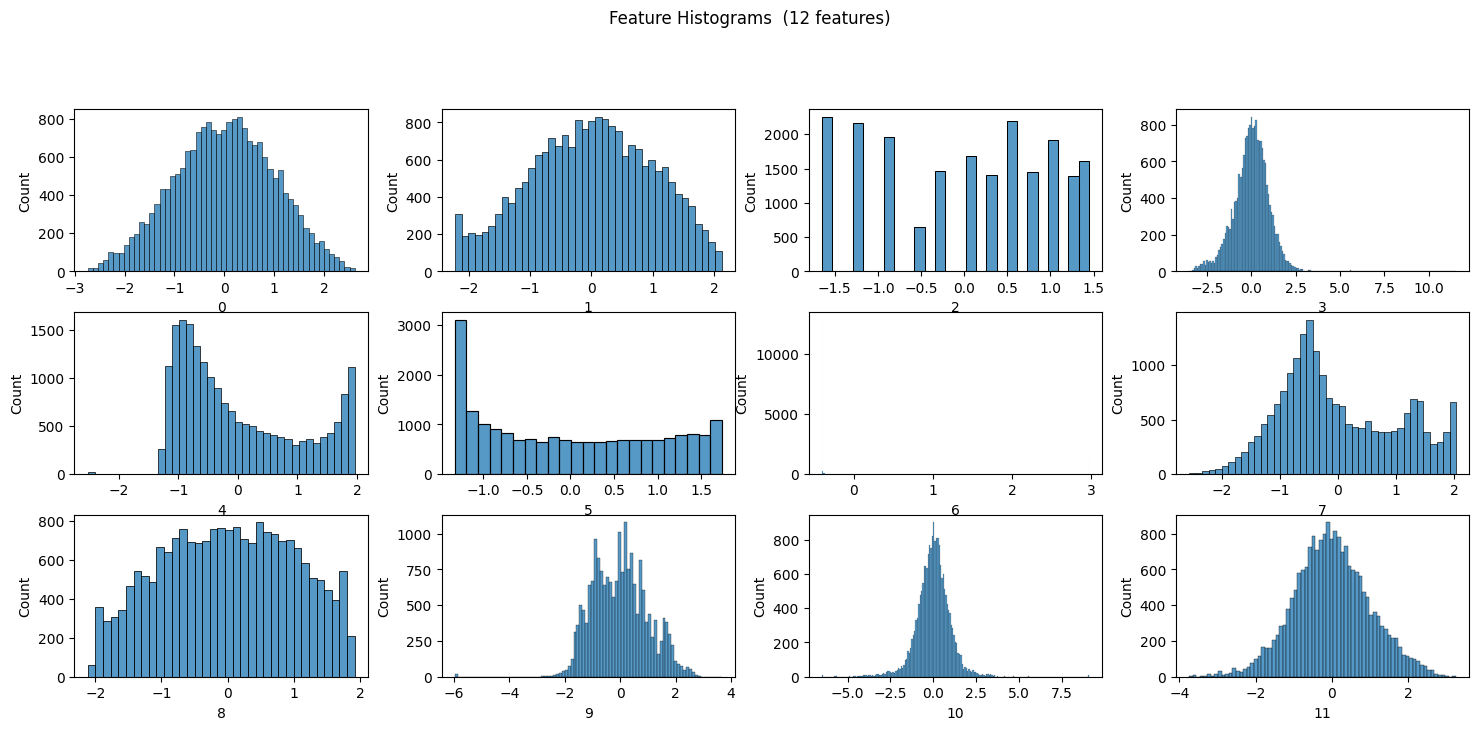

In [16]:
from sklearn.preprocessing import PowerTransformer 
pt = PowerTransformer(method='yeo-johnson') # transform data to be Gaussian, mean 0, std dev 1
ptrans = pt.fit_transform(df_num) # features 2,4,5,7 seem to not normalize
ptrans.shape

feature_histogram_set(pd.DataFrame(ptrans))